## 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = '7EXK3xPZUDTnfzuz25Jw'

In [3]:
# Importing the data.

data = quandl.get('BOE/XUMABK63')

In [4]:
data

,Value
Date,
2005-04-30,138.7838
2005-05-31,135.3115
2005-06-30,132.1859
2005-07-31,134.7324
2005-08-31,136.0300
...,...
2021-02-28,127.4585
2021-03-31,129.3539
2021-04-30,130.4700


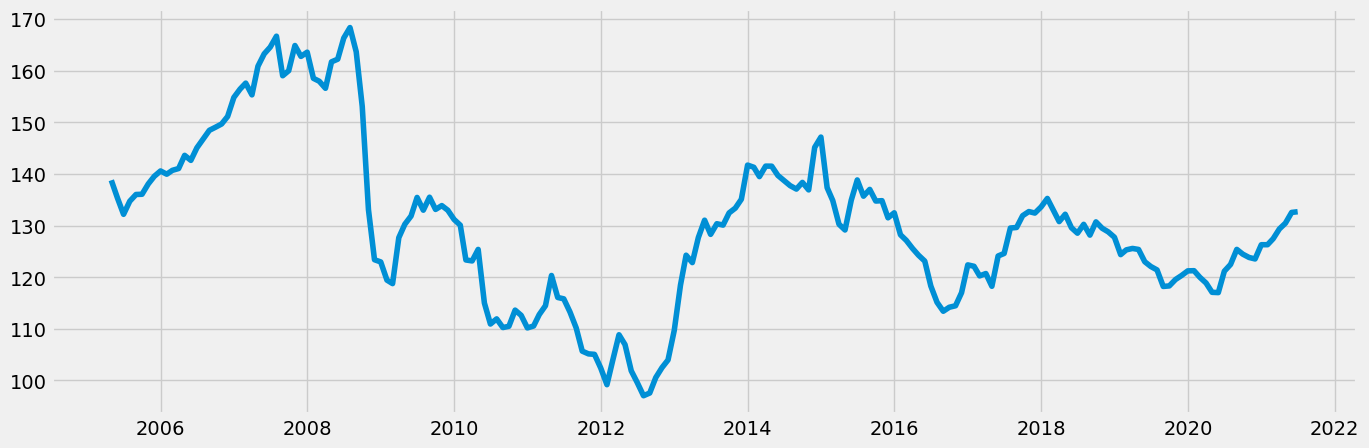

In [5]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

## 2. Subsetting, wrangling, and cleaning time-series data

In [6]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [7]:
data_2

,Date,Value
0,2005-04-30,138.7838
1,2005-05-31,135.3115
2,2005-06-30,132.1859
3,2005-07-31,134.7324
4,2005-08-31,136.0300
...,...,...
190,2021-02-28,127.4585
191,2021-03-31,129.3539
192,2021-04-30,130.4700
193,2021-05-31,132.5553


In [8]:
# Set the "Date" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['Date'])
data_2 = data_2.set_index('datetime') 
data_2.drop(['Date'], axis=1, inplace=True)
data_2.head()

,Value
datetime,
2005-04-30,138.7838
2005-05-31,135.3115
2005-06-30,132.1859
2005-07-31,134.7324
2005-08-31,136.0300


In [9]:
# Check for missing values

data_2.isnull().sum() 

Value    0
dtype: int64

In [10]:
# Check for duplicates

dups = data_2.duplicated()
dups.sum()

0

## 3. Time-series analysis: decomposition

In [11]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [12]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

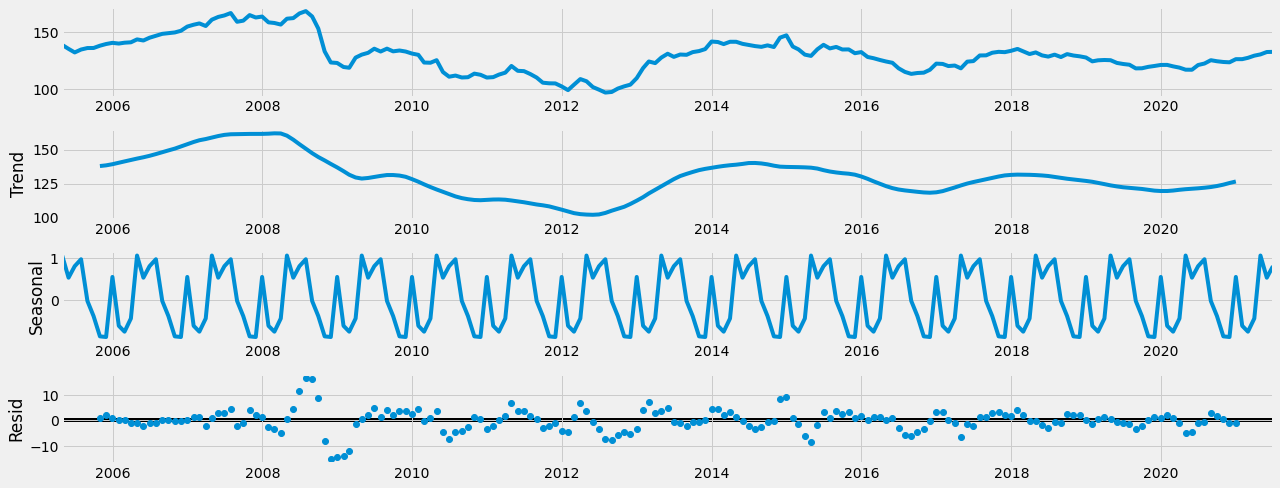

In [13]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend chart above shows starting with a sharp decline in 2009 and continues to decline until 2013. It started to rise again in 2013 and has been moving up and down slowly until now. The seassonal chart shows there is seasonal fluctuations represented by a spikey curve that changes at a regular interval. Through out the entier period, there is constant noise from 2006 to 2020. 

## 4. Dickey-Fuller test

In [14]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(data_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.131750
p-value                          0.231941
Number of Lags Used              1.000000
Number of Observations Used    193.000000
Critical Value (1%)             -3.464694
Critical Value (5%)             -2.876635
Critical Value (10%)            -2.574816
dtype: float64


The test statistic (-2.131750) larger than critical value (-2.876635) = cannot reject null hypothes.
We can consider that this time series is non-stationary.

## 5. Autocorrelations

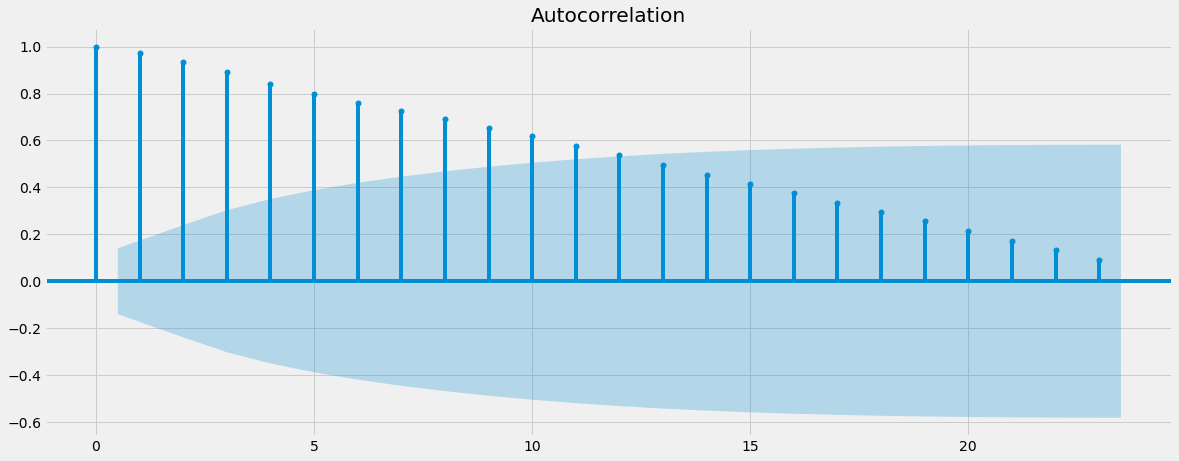

In [15]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_2)
plt.show()

Several lines go above the blue edge of the confidence interval. It's significantly correlated with each other thus  we can desuce to say the data is non-stationary.

## 6. Stationarise

In [16]:
data_3 = data - data.shift(1)

In [22]:
data_3.dropna(inplace = True) 

In [23]:
data_3.head()

,Value
Date,
2005-05-31,-3.4723
2005-06-30,-3.1256
2005-07-31,2.5465
2005-08-31,1.2976
2005-09-30,0.0455


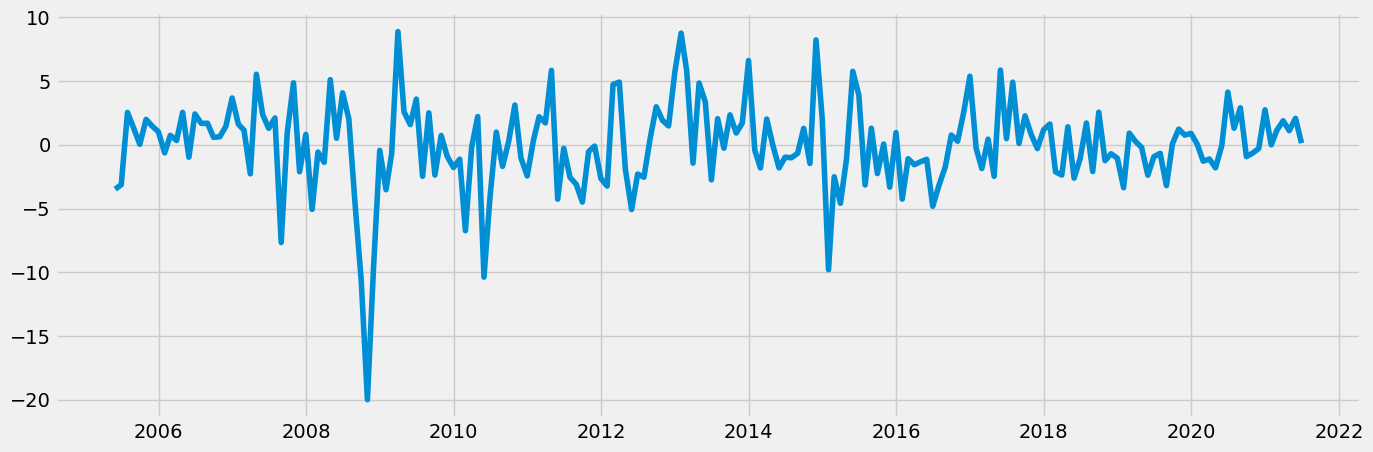

In [24]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_3)

There are a number of up-and-down deviations in the period of time. Especially around the 2009 financial crisis, it shows strong deviation. 

In [31]:
# Round to the 8th decimal place

pd.options.display.float_format = '{:.8f}'.format

In [32]:
dickey_fuller(data_3)

Dickey-Fuller Stationarity test:
Test Statistic                -10.04011015
p-value                         0.00000000
Number of Lags Used             0.00000000
Number of Observations Used   193.00000000
Critical Value (1%)            -3.46469408
Critical Value (5%)            -2.87663488
Critical Value (10%)           -2.57481640
dtype: float64


The test statistic (-10.04011015) smaller than critical value (-2.87663488) = can reject null hypothes.
We can consider that this time series is stationary.

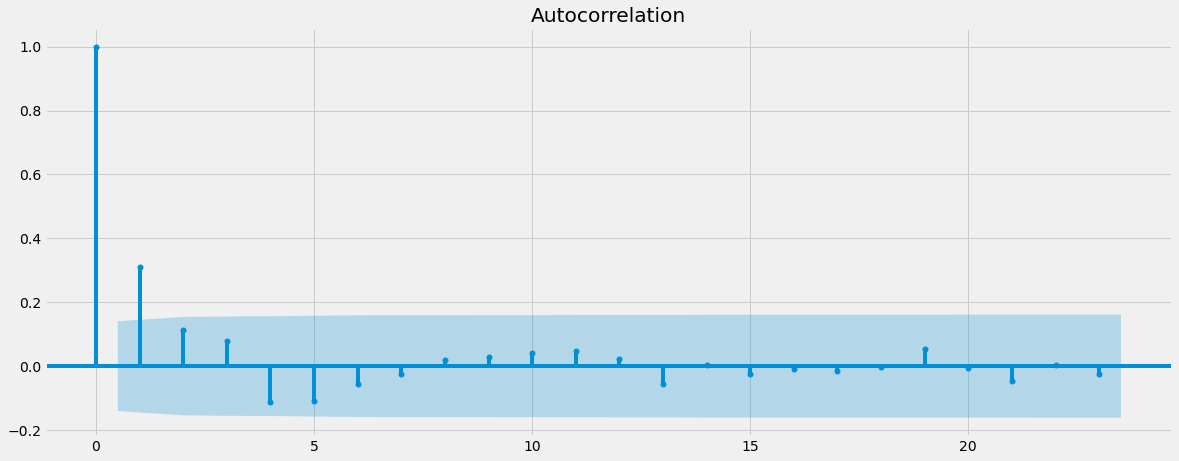

In [26]:
plot_acf(data_3)
plt.show()

Only 2 lines go above the blue edge of the confidence interval. We can desuce to say the data is stationary.